# Tarea 6: Integración con Taylor

Fecha de envío del PR inicial: **viernes 5 de mayo**

Fecha de aceptación del PR: **martes 16 de mayo, antes de la clase**

---

## Ejercicio 1

Usando su implementación de polinomios de Taylor, escriban un integrador para la ecuación diferencial que se desarrolló en este ejemplo, esto es, $\dot{x} = x^2$ con la condición inicial $x(0) = 3$. 

El integrador debe hacer las operaciones necesarias para obtener automáticamente los coeficientes $x_{[k]}$, *en cada paso de integración*, a partir de la condición inicial local. Un requisito básico para esto es que tengan una implementación de la función $P_\alpha(x) = [g(x)]^\alpha$ con $g(x)$ un polinomio de Taylor, que hicieron en la "Tarea5", y que funcione bien en particular para `alpha::Int`.

La implementación debe consistir de varias funciones: 

- Una función donde se calculen los coeficientes $x_{[k]}$ de la expansión. Esta función deberá llamar a otra donde se implementan las recurrencias que imponen las ecuaciones de movimiento.

- Una función donde se obtenga el paso de integración $h$ como se describió en el notebook 10.

- Otra función donde se haga la suma usando el método de Horner.

- Finalmente, una función que combine las funciones anteriores para hacer la integración desde un tiempo inicial a uno final. En este punto, *fingiremos ignorancia*, en el sentido de  que el tiempo inicial es cero, y el tiempo final será $0.5$ (que está más allá de donde la solución está definida).


Dado que conocemos la solución analítica de este problema, grafiquen como función de $t$ el error relativo de su integrador (respecto al valor del resultado analítico).

In [1]:
using PyPlot

INFO: Recompiling stale cache file /home/madara/.julia/lib/v0.5/PyPlot.ji for module PyPlot.


In [1]:
include("TaylorDiff.jl")
using ATaylor

In [2]:
"""
coefTaylor(x0,N)

Función que regresa un vector con los coeficientes de Taylor, donde x0 es la condición inicial \$x(0)=3\$ y \$N\$ es
 el grado del polinomio de Taylor.
"""
function coefTaylor(x0,N)
    xT=taylor([x0],N)
    for n in 1:N
        a=(xT)^2
        xT.v[n+1]=a.v[n]/n
    end
    return xT.v
end
"""
pasointh(x0,N,ϵ)

Función que regresa el paso de integración \$h\$ para un polinomio de Taylor de orden N, 
donde x0 es la condición inicial \$x(0)=3\$ y \$N\$ es
 el grado del polinomio de Taylor.
"""
function pasointh(x0,N,ϵ)
    x=Taylor(coefTaylor(x0,N))
    h=(ϵ/x.v[N+1])^(1/N)
    l=(ϵ/x.v[N])^(1/(N-1))
    if h<=l
        return h
    else
        return l
    end
end
"""
Horner(h,x,P)

Función que regresa \$x_1\$ después de evaluar \$h\$ en el polinomio de Taylor. Implementa el método de Horner. 
\$h\$(paso de integración), \$x\$(vector de coeficientes de Taylor), \$P\$(grado máximo del polinomio) 
"""
function Horner(h,x,P)
    r = x[P]
    for i in P:-1:2
        r = x[i-1] + h*r
    end
    return r
end
"""
solecuacion(t0,tf)

Solución de la ecuación diferencial. 
"""
function solecuacion(x0,ϵ,N,tf)
    M=2000
    a=zeros(eltype(x0), M)
    s=zeros(eltype(x0), M)
    z=zeros(eltype(x0), M)
    s[1]=x0
    a[1]=x0
    i=2
    while i<=M && z[i-1]<=tf
        x=coefTaylor(x0,N)
        h=pasointh(x0,N,ϵ)
        x0=Horner(h,x,N)
        s[i]=x0
        z[i]=z[i-1]+h
        a[i]=3.0/(1-3*(z[i]))
        i+=1
    end
    q=Taylor(z)
    w=Taylor(s)
    e=Taylor(a)
    return q.v,w.v,e.v
end

coefTaylor

In [6]:
x0=3.0
ϵ=1e-20
N=17
tf=0.5
z,s,a=solecuacion(x0,ϵ,N,tf)

([0.0,0.0175008,0.034027,0.049636,0.0643814,0.0783139,0.0914809,0.103927,0.115693,0.126819  …  0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333],[3.0,3.16624,3.34106,3.52488,3.71814,3.92127,4.13475,4.35907,4.59474,4.84229  …  3.61429e14,3.63948e14,3.66483e14,3.69034e14,3.71603e14,3.74188e14,3.76789e14,3.79408e14,3.82044e14,3.84697e14],[3.0,3.16624,3.34106,3.52488,3.71814,3.92127,4.13475,4.35907,4.59474,4.84229  …  3.97376e14,3.97376e14,3.97376e14,3.97376e14,3.97376e14,3.97376e14,3.97376e14,3.97376e14,3.97376e14,3.97376e14])

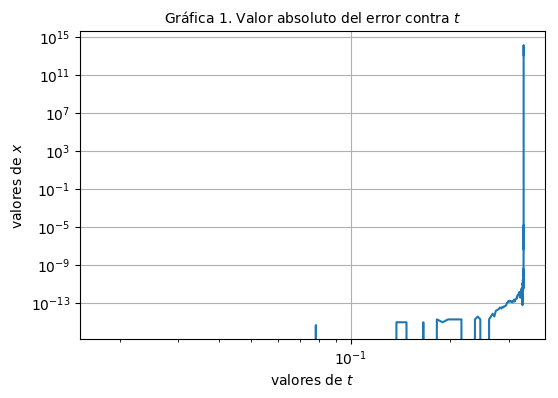

In [8]:
figure(figsize=(6,4)) # este comando define el tamaño de la figura
plot(z,abs(a-s))    # este comando pinta la función f'(x); 
#plot(z,log10(abs(a-s)))
title(L"Gráfica 1. Valor absoluto del error contra $t$", fontsize=10)
xlabel(L"valores de $t$")
ylabel(L"valores de $x$")
xscale("log")
yscale("log")
grid() 
#xrange(0.3,0.5)

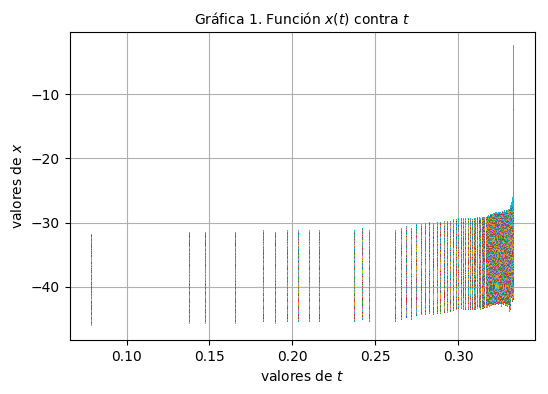

In [9]:
figure(figsize=(6,4)) # este comando define el tamaño de la figura
#plot(z,a-s)    # este comando pinta la función f'(x); 
plot(z,log10(abs(a-s)/a), ",")
title(L"Gráfica 1. Función $x(t)$ contra $t$", fontsize=10)
xlabel(L"valores de $t$")
ylabel(L"valores de $x$")
grid() 
#xrange(0.3,0.5)

In [10]:
#Aumento el orden del polinomio
N=25
z,s,a=solecuacion(x0,ϵ,N,tf)

([0.0,0.0467375,0.0866696,0.120824,0.150067,0.17513,0.196634,0.215102,0.230979,0.244641  …  0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333],[3.0,3.48923,4.0541,4.70567,5.45653,6.32099,7.31533,8.45801,9.76998,11.275  …  1.98357e11,1.98357e11,1.98357e11,1.98357e11,1.98357e11,1.98357e11,1.98357e11,1.98357e11,1.98357e11,1.98357e11],[3.0,3.48923,4.0541,4.70567,5.45653,6.32099,7.31533,8.45801,9.76998,11.275  …  1.98372e11,1.98372e11,1.98372e11,1.98372e11,1.98372e11,1.98372e11,1.98372e11,1.98372e11,1.98372e11,1.98372e11])

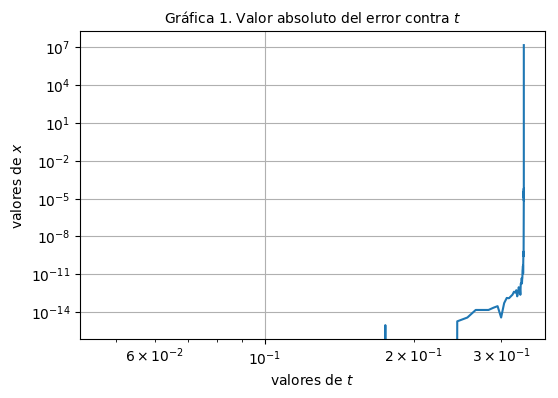

In [11]:
figure(figsize=(6,4)) # este comando define el tamaño de la figura
plot(z,abs(a-s))    # este comando pinta la función f'(x); 
#plot(z,log10(abs(a-s)))
title(L"Gráfica 1. Valor absoluto del error contra $t$", fontsize=10)
xlabel(L"valores de $t$")
ylabel(L"valores de $x$")
xscale("log")
yscale("log")
grid() 

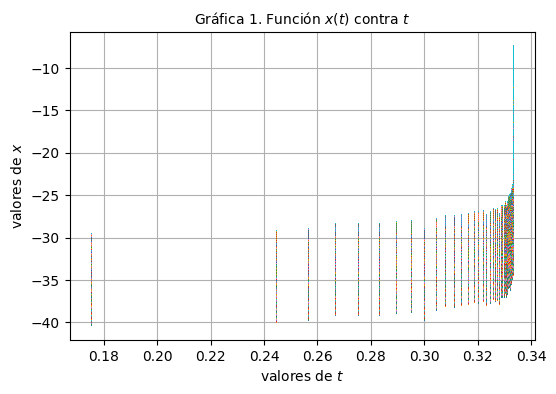

In [12]:
figure(figsize=(6,4)) # este comando define el tamaño de la figura
#plot(z,a-s)    # este comando pinta la función f'(x); 
plot(z,log10(abs(a-s)/a), ",")
title(L"Gráfica 1. Función $x(t)$ contra $t$", fontsize=10)
xlabel(L"valores de $t$")
ylabel(L"valores de $x$")
grid() 
#xrang

## Ejercicio 2

Repitan la integración del ejercicio anterior usando el método de Runge-Kutta de 4o orden con paso de integración fijo (que es lo más sofisticado que conocen hasta ahora) y comparen los resultados del error relativo con los obtenidos con el método de Taylor. En particular, finjan ignorancia de la misma manera que en el ejercicio anterior.

**El método de Runge-Kutta**

Para el problema de valores iniciales
$$y'=f(x,y)$$
$$y(x_0)=y_0$$
La fórmula de Runge-Kutta involucra un promedio pesado de los valores de $f(x,y)$ tomado en puntos diferentes en el intervalo $x_n\leq x\leq x_{n+1}$. Está dada por
\begin{equation}
y_{n+1}=y_n+\frac{h}{6}\left[k_{n1}+2k_{n2}+2k_{n3}+k_{n4}\right]
\end{equation}
donde
$$\begin{array}{lll}
    k_{n1}& = &f(x_{n},y_{n})\\
    k_{n2}& = &f(x_{n}+\frac{1}{2}h,y_{n}+\frac{1}{2}hk_{n1})\\
    k_{n3}& = &f(x_{n}+\frac{1}{2}h,y_{n}+\frac{1}{2}hk_{n2})\\
    k_{n4}& = &f(x_{n}+h,y_{n}+hk_{n3})\\
  \end{array}$$
ver(Introducción a las Ecuaciones Diferenciales, E. Boyce y C. DiPrima).

Si $\dot{x}=f(t,x)=x^2$ con la condición inicial $x(t_0=0)=x_0 = 3$ entonces para $n=0$
$$\begin{array}{lll}
    k_{01}& = &f(t_{0},x_{0})=3^2\\
    k_{02}& = &f(t_{0}+\frac{1}{2}h,x_{0}+\frac{1}{2}hk_{01})=f(\frac{1}{2}h,3+\frac{1}{2}h3^2)
    =\left[3+\frac{1}{2}h3^2\right]^2\\
    k_{03}& = &f(t_{0}+\frac{1}{2}h,x_{0}+\frac{1}{2}hk_{02})=\left[3+\frac{1}{2}h\left(3+\frac{1}{2}h3^2\right)^2\right]^2\\
    k_{04}& = &f(t_{0}+h,x_{0}+hk_{03})=\left\{3+h\left[3+\frac{1}{2}h\left(3+\frac{1}{2}h3^2\right)^2\right]^2\right\}^2\\
  \end{array}$$
  
  \begin{equation}
x_{1}=x_0+\frac{h}{6}\left[k_{01}+2k_{02}+2k_{03}+k_{04}\right]
\end{equation}

In [2]:
"""
    metRungeKutta(f,x0,y0,N,h)

Esta función resuelve la ecuación diferencial \$y'=f(x,y)\$ con condición inicial \$y(x_0)=y_0\$. Los valores de 
entrada son \$f=f(x,y)\$, \$x0,y0\$(condiciones iniciales), \$N\$(número de iteraciones), \$h\$(tamaño del intervalo 
\$[x_n,x_{n+1}]\$).
"""
function metRungeKutta(f,x0,y0,N,h)
    y=zeros(eltype(h),N)
    x=zeros(eltype(h),N)
    x[1]=x0 
    y[1]=y0
    for i in 1:N-1
        kn1=f(x[i],y[i])
        kn2=f(x[i]+(1/2)*h,y[i]+(1/2)*h*kn1)
        kn3=f(x[i]+(1/2)*h,y[i]+(1/2)*h*kn2)
        kn4=f(x[i]+h,y[i]+h*kn3)
        y[i+1]=y[i]+(h/6)*(kn1 +2kn2+2kn3+kn4)
        x[i+1]=i*h
    end
    return x,y
end
"""
    funcion(g,N,h)

Esta función regresa los vectores \$x\$ y \$y=g(x)\$ para \$N\$ puntos separados una distancia \$h\$.
"""
function funcion(g,N,h)
    x=zeros(eltype(h),N)
    y=zeros(eltype(h),N)
    for i in 1:N
        x[i]=(i-1)*h
        y[i]=g(x[i])
    end
    return x,y
end

funcion

In [14]:
?metRungeKutta

search:



```
metRungeKutta(f,x0,y0,N,h)
```

Esta función resuelve la ecuación diferencial $y'=f(x,y)$ con condición inicial $y(x_0)=y_0$. Los valores de  entrada son $f=f(x,y)$, $x0,y0$(condiciones iniciales), $N$(número de iteraciones), $h$(tamaño del intervalo  $[x_n,x_{n+1}]$).


In [15]:
f(t,x)=x^2  #ecuación diferencial
g(t)=3/(1-3t) #solución analítica a la ecuación diferencial
h=0.01  
N=500
x0=0.0 #valor de t_0=0.0
y0=3.0 #valor de x0=3.0
(t,x)=metRungeKutta(f,x0,y0,N,h)
(a,b)=funcion(g,N,h)

([0.0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09  …  4.9,4.91,4.92,4.93,4.94,4.95,4.96,4.97,4.98,4.99],[3.0,3.09278,3.19149,3.2967,3.40909,3.52941,3.65854,3.79747,3.94737,4.10959  …  -0.218978,-0.2185,-0.218023,-0.217549,-0.217077,-0.216606,-0.216138,-0.215672,-0.215208,-0.214746])

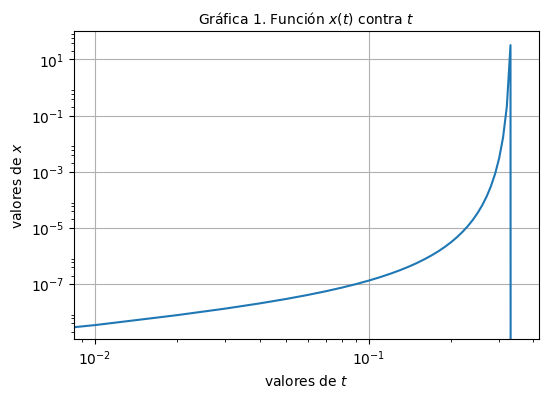

In [20]:
figure(figsize=(6,4)) # este comando define el tamaño de la figura
plot(t,b-x)    # este comando pinta la función f'(x); 
#plot(a,b)
title(L"Gráfica 1. Función $x(t)$ contra $t$", fontsize=10)
xlabel(L"valores de $t$")
ylabel(L"valores de $x$")
xscale("log")
yscale("log")
grid() 

In [24]:
#cambio el tamaño del paso h a h=0.001
h=0.001
(t,x)=metRungeKutta(f,x0,y0,N,h)
(a,b)=funcion(g,N,h)

([0.0,0.001,0.002,0.003,0.004,0.005,0.006,0.007,0.008,0.009  …  0.49,0.491,0.492,0.493,0.494,0.495,0.496,0.497,0.498,0.499],[3.0,3.00903,3.01811,3.02725,3.03644,3.04569,3.05499,3.06435,3.07377,3.08325  …  -6.38298,-6.34249,-6.30252,-6.26305,-6.22407,-6.18557,-6.14754,-6.10998,-6.07287,-6.03622])

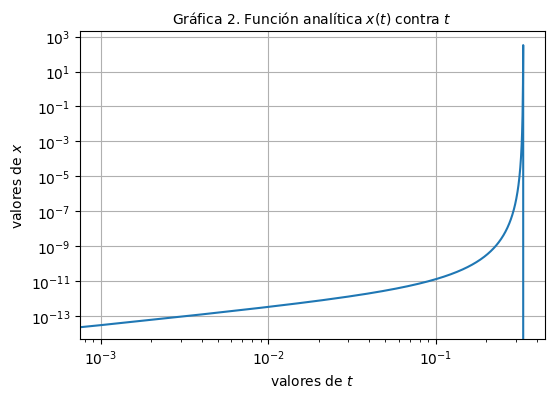

In [25]:
figure(figsize=(6,4)) # este comando define el tamaño de la figura
plot(a,b-x)    # este comando pinta la función f'(x); 
title(L"Gráfica 2. Función analítica $x(t)$ contra $t$", fontsize=10)
xlabel(L"valores de $t$")
ylabel(L"valores de $x$")
xscale("log")
yscale("log")
grid()

---

## Ejercicio 3

Integra la ecuación de movimiento para el oscilador armónico, $\ddot{x} = -2x$, con $x(0)=2$, $\dot{x}(0)=0$, durante 10^4 periodos de oscilación (o sea, hasta $t_f = 10^4 \cdot 2\pi/\sqrt{2}$, usando el método de Taylor y el método de Runge-Kutta de 4o orden con paso de integración constante. Compara cómo cambia la energía (respecto al valor al tiempo cero) en función del tiempo en ambos métodos.

**Solución analítica**

Sea $x(t)=Ae^{\alpha t}$ entonces
$$\ddot{x}+2x=0\hspace{.5cm}\Rightarrow \alpha^2Ae^{\alpha t}+2Ae^{\alpha t}=0\Rightarrow \alpha^2+2=0\Rightarrow \alpha=\pm i\sqrt{2}$$ por lo que

$$\displaystyle{x(t)=Ae^{it\sqrt{2}}+Be^{-it\sqrt{2}} }$$
$$\displaystyle{\dot{x}(t)=i\sqrt{2}Ae^{it\sqrt{2}}-i\sqrt{2}Be^{-it\sqrt{2}} }$$

por las condiciones iniciales
$$x(0)=A+B=2$$
$$\dot{x}(0)=i\sqrt{2}A-i\sqrt{2}B=0$$

$$B=A$$
$$A=1$$

entonces
$$\displaystyle{x(t)=e^{it\sqrt{2}}+e^{-it\sqrt{2}}=2\cos\left(t\sqrt{2}\right) }$$
$$\displaystyle{\dot{x}(t)=-2\sqrt{2}\sin\left(t\sqrt{2}\right) }$$

Para el oscilador armónico donde $F(x)=-kx$, $V(x)=-\int F(x)dx$, $E=T+V$, donde $T$ es la energía cinética y $V$ la potencial.

$$E=\frac{1}{2}m\dot{x}^2+\frac{1}{2}kx^2$$


Del problema observo $k/m=2$ entonces
$$\frac{E}{m}=\frac{1}{2}\dot{x}^2+\frac{k}{2m}x^2=\frac{1}{2}\dot{x}^2+x^2=\hat{E}=\mbox{cte}$$

In [1]:
tf=10^4*2*π/sqrt(2)#tiempo total de las oscilaciones

44428.82938158366

In [23]:
"""
    metRungeKutta2(f1,f2,x0,y0,z0,N,h)

Esta función resuelve la ecuación diferencial \$y=f1(x,y,z)=\dot{x}\$ con condición inicial \$\dot{x}(x_0)=y_0\$,
\$-2x=f2(x,y,z)=\ddot{x}\$ con condición inicial \$x(x_0)=z_0\$. Los valores de 
entrada son \$f1=f1(x,y,z)\;,f2=f2(x,y,z)\$, \$x0,y0,z0\$(condiciones iniciales), \$N\$(número de iteraciones), 
\$h\$(tamaño del intervalo \$[x_n,x_{n+1}]\$).
"""
function metRungeKutta2(f1,f2,x0,y0,z0,N,h)
    y=zeros(eltype(h),N)
    x=zeros(eltype(h),N)
    z=zeros(eltype(h),N)
    E=zeros(eltype(h),N)
    x[1]=x0 
    y[1]=y0
    z[1]=z0
    E[1]=(1/2)*z[1]^2+y[1]^2#energía inicial
    for i in 1:N-1
        kn11=f1(x[i],y[i],z[i])#kn1 para f
        kn12=f2(x[i],y[i],z[i])#kn1 para g
        
        kn21=f1(x[i]+(1/2)*h,y[i]+(1/2)*h*kn11,z[i]+(1/2)*h*kn12)#kn1 para f
        kn22=f2(x[i]+(1/2)*h,y[i]+(1/2)*h*kn11,z[i]+(1/2)*h*kn12)#kn1 para g
        
        kn31=f1(x[i]+(1/2)*h,y[i]+(1/2)*h*kn21,z[i]+(1/2)*h*kn22)#kn1 para f
        kn32=f2(x[i]+(1/2)*h,y[i]+(1/2)*h*kn21,z[i]+(1/2)*h*kn22)#kn1 para g
        
        kn41=f1(x[i]+h,y[i]+h*kn31,z[i]+h*kn32)#kn1 para f
        kn42=f2(x[i]+h,y[i]+h*kn31,z[i]+h*kn32)#kn1 para g
        
        y[i+1]=y[i]+(h/6)*(kn11 +2kn21+2kn31+kn41)
        z[i+1]=z[i]+(h/6)*(kn12 +2kn22+2kn32+kn42)
        E[i+1]=(1/2)*z[i+1]^2+y[i+1]^2
        x[i+1]=i*h
    end
    return x,y,z,E
end

metRungeKutta2

In [24]:
f1(t,x,y)=y #primera derivada de x
f2(t,x,y)=-2x #segunda derivada de x
x0=0
y0=2
z0=0
N=44500
h=0.01
t,x,y,E=metRungeKutta2(f1,f2,x0,y0,z0,N,h)
g(t)=2.0*cos(sqrt(2)*t) #función analítica
(a,b)=funcion(g,N,h)

([0.0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09  …  444.9,444.91,444.92,444.93,444.94,444.95,444.96,444.97,444.98,444.99],[2.0,1.9998,1.9992,1.9982,1.9968,1.995,1.9928,1.99021,1.98721,1.98382  …  1.29715,1.2755,1.25358,1.23142,1.20901,1.18636,1.16347,1.14035,1.117,1.09343])

In [10]:
44500000*0.001

44500.0

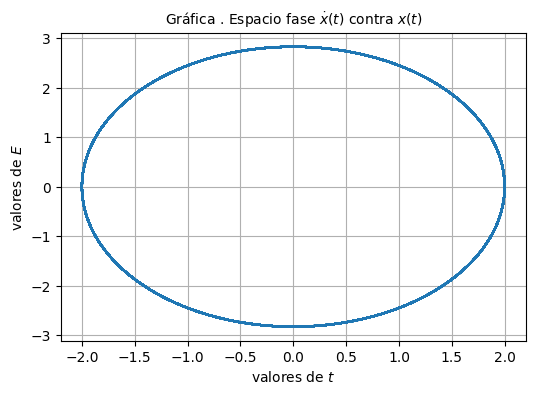

In [25]:
figure(figsize=(6,4)) # este comando define el tamaño de la figura
plot(x,y)    # este comando pinta la función f'(x); 
#plot(t,y)
#plot(t,E)
title(L"Gráfica . Espacio fase $\dot{x}(t)$ contra $x(t)$", fontsize=10)
xlabel(L"valores de $t$")
ylabel(L"valores de $E$")
#xscale("log")
#yscale("log")
grid()

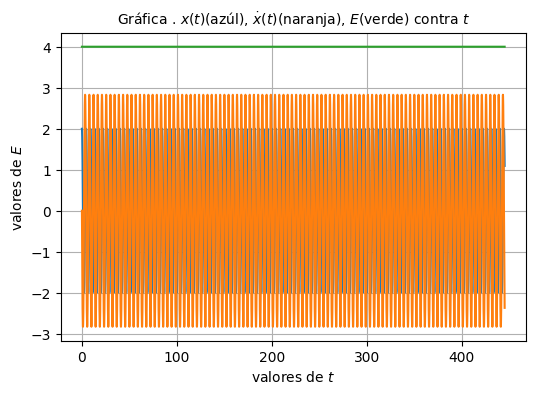

In [31]:
figure(figsize=(6,4)) # este comando define el tamaño de la figura
plot(t,x)    # este comando pinta la función f'(x); 
plot(t,y)
plot(t,E)
title(L"Gráfica . $x(t)$(azúl), $\dot{x}(t)$(naranja), $E$(verde) contra $t$", fontsize=10)
xlabel(L"valores de $t$")
ylabel(L"valores de $E$")
#xscale("log")
#yscale("log")
grid()

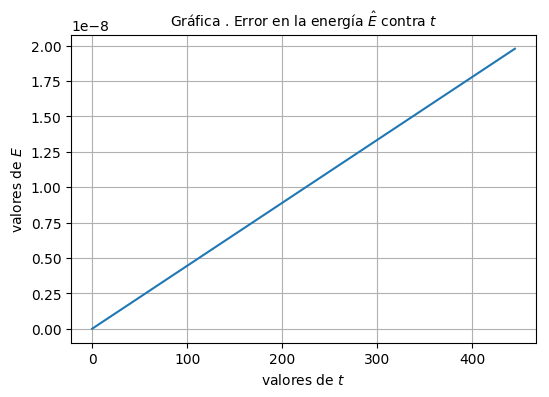

In [28]:
figure(figsize=(6,4)) # este comando define el tamaño de la figura
plot(t,4-E)
title(L"Gráfica . Error en la energía $\hat{E}$ contra $t$", fontsize=10)
xlabel(L"valores de $t$")
ylabel(L"valores de $E$")
grid()